In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('netflix.csv')
dataset.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
dataset.shape

(7789, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [16]:
dataset.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [15]:
dataset['Director'].bfill(inplace = True)
dataset['Cast'].ffill(inplace = True)
dataset['Country'].ffill(inplace = True)
dataset['Release_Date'].ffill(inplace = True)
dataset['Rating'].ffill(inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10124\4190146018.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Rating'].ffill(inplace = True)


In [17]:
dataset['Category'].value_counts()

Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

In [19]:
dataset.size

85679

In [25]:
# dataset.duplicated().sum()
dataset[dataset.duplicated()]
dataset.drop_duplicates(inplace = True)

In [26]:
dataset.duplicated().sum()

np.int64(0)

In [27]:
dataset[dataset['Title']=='House of Cards']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [32]:
dataset['Release_Date'].dtype

dtype('O')

In [34]:
dataset['Release_Date'].unique()

array(['August 14, 2020', 'December 23, 2016', 'December 20, 2018', ...,
       'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [35]:
# Strip extra spaces from the column
dataset['Release_Date'] = dataset['Release_Date'].str.strip()

# Convert to datetime, handling errors
dataset['Date'] = pd.to_datetime(dataset['Release_Date'], errors='coerce')

# Check for invalid dates (if any)
invalid_dates = dataset[dataset['Date'].isna()]
print("Invalid dates:\n", invalid_dates)

# Drop rows with invalid dates or handle them as required
dataset.dropna(subset=['Date'], inplace=True)


Invalid dates:
 Empty DataFrame
Columns: [Show_Id, Category, Title, Director, Cast, Country, Release_Date, Rating, Duration, Type, Description, Released year, Date]
Index: []


In [37]:
dataset['Mov Date'] = dataset['Date'].dt.year

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Show_Id        7787 non-null   object        
 1   Category       7787 non-null   object        
 2   Title          7787 non-null   object        
 3   Director       7787 non-null   object        
 4   Cast           7787 non-null   object        
 5   Country        7787 non-null   object        
 6   Release_Date   7787 non-null   object        
 7   Rating         7787 non-null   object        
 8   Duration       7787 non-null   object        
 9   Type           7787 non-null   object        
 10  Description    7787 non-null   object        
 11  Released year  7787 non-null   object        
 12  Date           7787 non-null   datetime64[ns]
 13  Mov Date       7787 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(12)
memory usage: 882.1+ KB


In [39]:
dataset['Mov Date'].value_counts()

Mov Date
2019    2156
2020    2010
2018    1688
2017    1227
2016     444
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: count, dtype: int64

In [56]:
gp= dataset.groupby('Mov Date')['Category'].count().sort_values(ascending=False)
print(gp)
# xx= dataset.groupby('Mov Date')['Category'].count().index
# yy= dataset.groupby('Mov Date')['Category'].count().values
df=pd.DataFrame(gp)

Mov Date
2019    2156
2020    2010
2018    1688
2017    1227
2016     444
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: Category, dtype: int64


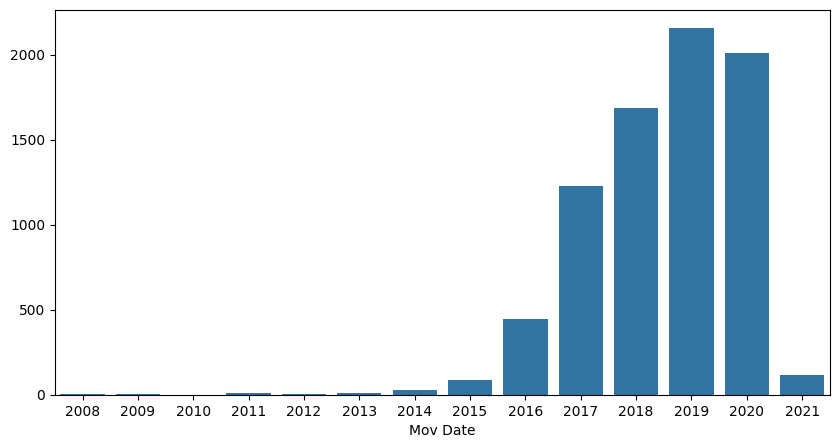

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x=gp.index,y=gp.values)
plt.show()

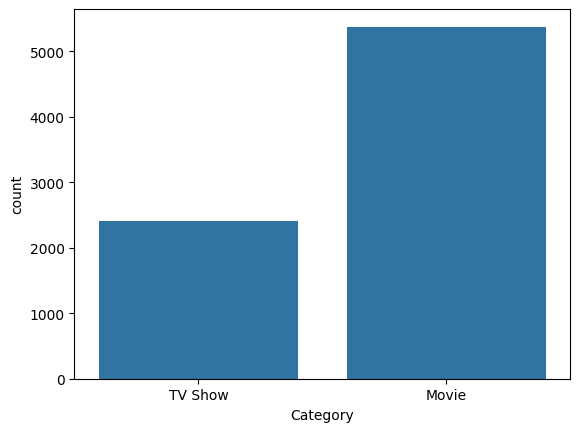

In [58]:
sns.countplot(data=dataset,x='Category')
plt.show()

In [62]:
dataset[(dataset['Category']=='Movie') & (dataset['Mov Date']==2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Released year,Date,Mov Date


In [83]:
dataset[(dataset['Country']=='India') & (dataset['Category']=='TV Show')]['Title'].head(10)

86     21 Sarfarosh: Saragarhi 1897
132                       7 (Seven)
340                    Agent Raghav
359                  Ajaibnya Cinta
364                    Akbar Birbal
365                   Akulah Balqis
533             Anjaan: Rural Myths
534     Anjaan: Special Crimes Unit
686     Bad Boy Billionaires: India
698      Badalte Rishton Ki Dastaan
Name: Title, dtype: object

Director
Marcus Raboy              28
Raúl Campos, Jan Suter    24
Dhanush                   21
Martin Scorsese           21
Jay Karas                 17
Steven Soderbergh         16
Jay Chapman               16
Cathy Garcia-Molina       16
Khaled Marei              14
Jay Roach                 14
Name: count, dtype: int64


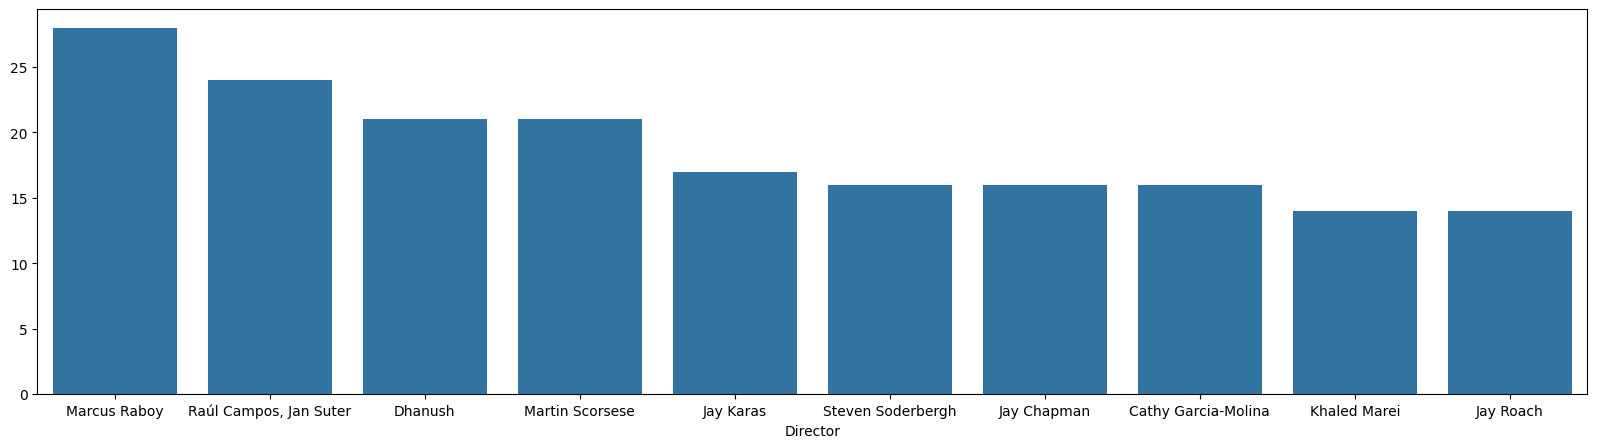

In [95]:
gp=dataset['Director'].value_counts().sort_values(ascending=False).head(10)
print(gp)
df2=pd.DataFrame(gp)
plt.figure(figsize=(20,5))
sns.barplot(data=df2,x=gp.index,y=gp.values)
plt.show()

In [99]:
dataset[dataset['Cast']=='Tom Cruise'].value_counts()

Series([], Name: count, dtype: int64)

In [121]:
dataset[(dataset['Category']=='Movie')&(dataset['Type']=='Comedies')|(dataset['Country']=='United Kingdom')].shape

(511, 12)

In [110]:
dataset[dataset['Cast']=='Tom Cruise']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date


In [113]:
dataset[dataset['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019


In [122]:
dataset['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [140]:
dataset[(dataset['Category']=='Movie')&(dataset['Rating']=='TV-14')].shape

(1276, 12)

In [133]:
data_new=dataset[(dataset['Category']=='Movie')&(dataset['Rating']=='TV-14') & (dataset['Country']=='Canada')].head(11)
data_new

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date
30,s31,Movie,#cats_the_mewvie,Michael Margolis,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",Canada,"February 5, 2020",TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,"December 1, 2017",TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,"Ramsey Nouah, Christine Allado, Ayo Makun, Emm...",Canada,"July 1, 2019",TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands...",2019
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,"June 18, 2019",TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019


C:\Users\DELL\AppData\Local\Temp\ipykernel_10124\3974736530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_new['Mov Date'], palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_10124\3974736530.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_new['Rating'], palette='muted')


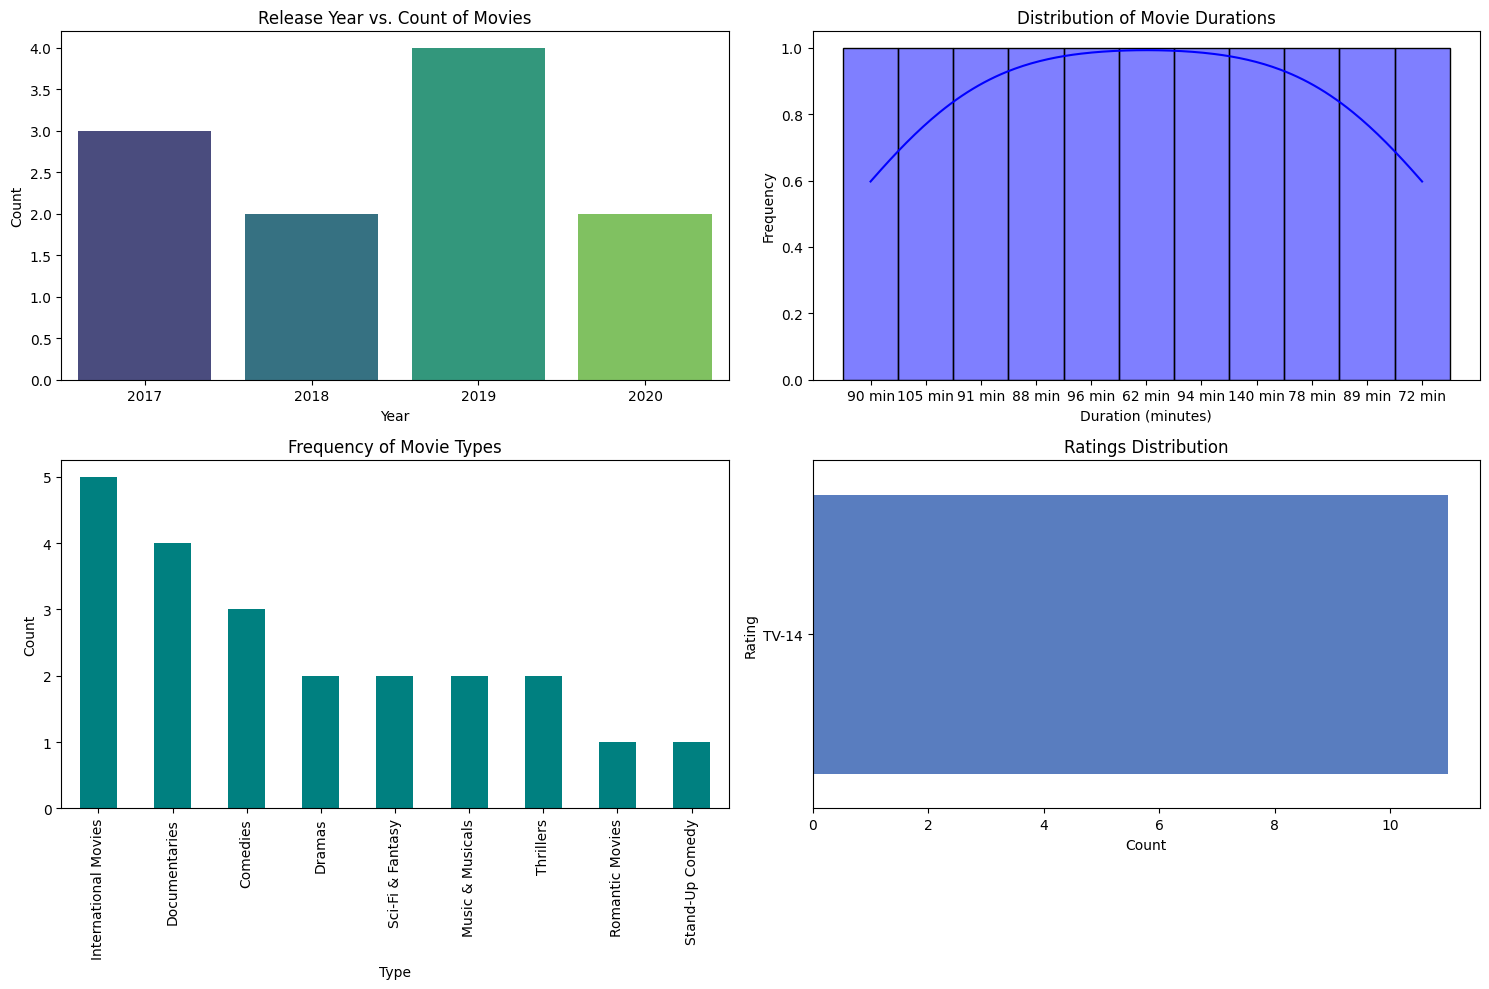

In [134]:
# Subplot 1: Release Year vs. Count of Movies
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x=data_new['Mov Date'], palette='viridis')
plt.title('Release Year vs. Count of Movies')
plt.xlabel('Year')
plt.ylabel('Count')

# Subplot 2: Duration Distribution
plt.subplot(2, 2, 2)
sns.histplot(data_new['Duration'], kde=True, color='blue', bins=10)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Subplot 3: Movie Types Frequency
plt.subplot(2, 2, 3)
type_counts = data_new['Type'].str.split(', ').explode().value_counts()
type_counts.plot(kind='bar', color='teal')
plt.title('Frequency of Movie Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Subplot 4: Ratings Distribution
plt.subplot(2, 2, 4)
sns.countplot(y=data_new['Rating'], palette='muted')
plt.title('Ratings Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

In [136]:
dataset.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date
0,s1,TV Show,3%,Jorge Michel Grau,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016


In [138]:
dataset[(dataset['Category']=='TV Show')&(dataset['Rating']=='R')&(dataset['Mov Date']>2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",United States,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019


In [149]:
dataset[['Minute','Unit']] =dataset['Duration'].str.split(' ',expand=True)

In [147]:
dataset.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date,Minute,Unit
0,s1,TV Show,3%,Jorge Michel Grau,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,93,min


In [155]:
dataset['Minute']=dataset['Minute'].astype(int)

In [157]:
dataset['Minute'].max()

np.int64(312)

In [169]:
gp1=dataset.groupby('Country')['Category'].count().max()
print(gp1)

2725


In [170]:
dataset[(dataset['Category']=='TV Show')]['Country'].max()

'Uruguay, Germany'

In [172]:
tv_show=dataset[(dataset['Category']=='TV Show')]
tv_show.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date,Minute,Unit
0,s1,TV Show,3%,Jorge Michel Grau,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,4,Seasons
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,1,Season


In [177]:
# tv_show.Country.value_counts()
tv_show['Country'].value_counts()

Country
United States                                    805
United Kingdom                                   218
Japan                                            167
South Korea                                      160
India                                            101
                                                ... 
United Kingdom, Spain                              1
Italy, United States                               1
Russia, Spain                                      1
Japan, Canada                                      1
United States, France, South Korea, Indonesia      1
Name: count, Length: 202, dtype: int64

In [179]:
dataset.sort_values(by = 'Mov Date').head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date,Minute,Unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008,81,min
1765,s1766,TV Show,Dinner for Five,Rohit Shetty,"Shah Rukh Khan, Kajol, Kriti Sanon, Kabir Bedi...",United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008,1,Season
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009,29,min
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009,104,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010,84,min
7416,s7415,Movie,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,"October 1, 2011",TV-14,93 min,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...,2011,93,min
2962,s2963,Movie,In Defense of a Married Man,Joel Oliansky,"Judith Light, Michael Ontkean, Jerry Orbach, P...",United States,"October 1, 2011",TV-14,94 min,Dramas,A lawyer's husband is having an affair. When h...,2011,94,min
7232,s7231,Movie,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,"October 1, 2011",TV-PG,93 min,"Dramas, Sports Movies","This drama tells the tale of Ricky Bell, a pro...",2011,93,min
3221,s3222,Movie,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,"September 27, 2011",TV-PG,75 min,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...,2011,75,min
5833,s5833,Movie,Strange Voices,Arthur Allan Seidelman,"Nancy McKeon, Valerie Harper, Stephen Macht, T...",United States,"October 1, 2011",TV-PG,96 min,Dramas,When their college-age daughter suddenly begin...,2011,96,min


In [187]:
dataset[(dataset['Category']=='Movie')&(dataset['Type']=='Dramas')].shape

(117, 14)

In [191]:
dataset[(dataset['Category']=='TV Show')&(dataset['Type']=="Kids' TV")].shape

(205, 14)

In [192]:
dataset[(dataset['Category']=='Movie')&(dataset['Type']=='Dramas') | (dataset['Category']=='TV Show')&(dataset['Type']=="Kids' TV")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Mov Date,Minute,Unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019,119,min
111,s112,TV Show,44 Cats,Jack C. Newell,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020,2,Seasons
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011,95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017,2,Seasons
7717,s7716,TV Show,Yoko,Kevin Smith,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",United States,"June 23, 2018",TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018,1,Season
7719,s7718,TV Show,YOM,Kevin Smith,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...","Russia, Spain","June 7, 2018",TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018,1,Season
7758,s7757,TV Show,Z4,Mani Ratnam,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019,2,Seasons
